In [1]:
import json
import os

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pprint

run_dir = os.path.join("runs", "run_3")
history_json = os.path.join(run_dir, "training_results.json")

In [2]:
print(history_json)

runs\run_3\training_results.json


In [3]:

# Load JSON data
with open(history_json, 'r') as f:
    data = json.load(f)

# Prepare data for DataFrame
rows = []
for model_name, datasets in data.items():
    for dataset_name, metrics in datasets.items():
        row = {
            "Model": model_name,
            "Dataset": dataset_name,
            "Final_Train_Accuracy": metrics["history"]["accuracy"][-1] if "accuracy" in metrics["history"] else None,
            "Final_Val_Accuracy": metrics["history"]["val_accuracy"][-1] if "val_accuracy" in metrics["history"] else None,
            "Evaluation_Accuracy": metrics["evaluation"]["accuracy"],
            "Evaluation_Loss": metrics["evaluation"]["loss"],
            "Training_Time": metrics["training_time"],
            "Optimal_Threshold": metrics.get("optimal_threshold")
        }
        rows.append(row)

# Create DataFrame
df = pd.DataFrame(rows)

# Save to CSV
output_path = os.path.join(run_dir, 'run_data.csv')
df.to_csv(output_path, index=False)

print(f"CSV file saved to {output_path}")


CSV file saved to runs\run_3\run_data.csv


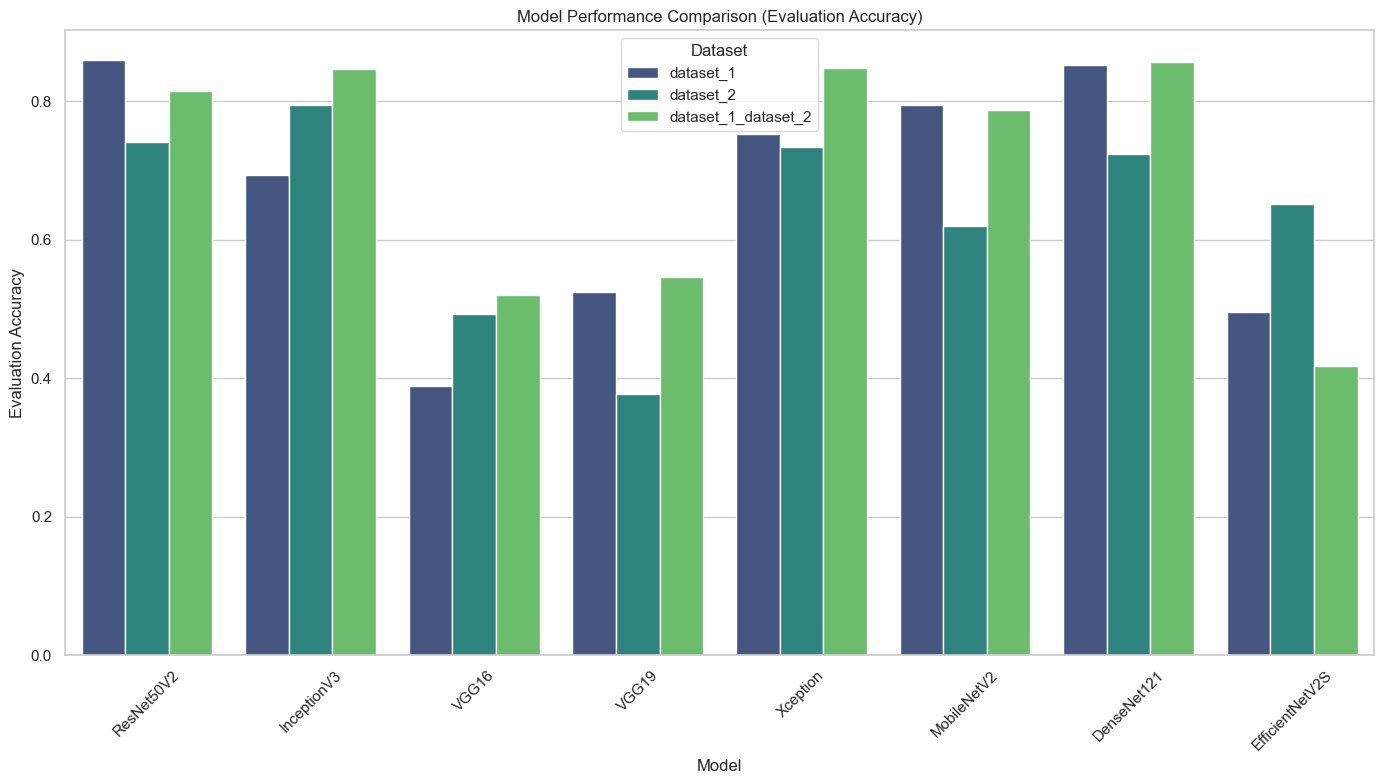

In [19]:
# Set plot style
sns.set(style="whitegrid")

# Create a bar plot for Evaluation Accuracy comparison across models and datasets
plt.figure(figsize=(14, 8))
plot = sns.barplot(
    data=df,
    x="Model",
    y="Evaluation_Accuracy",
    hue="Dataset",
    palette="viridis"
)

# Customize the plot
plot.set_title("Model Performance Comparison (Evaluation Accuracy)")
plot.set_ylabel("Evaluation Accuracy")
plot.set_xlabel("Model")
plt.xticks(rotation=45)
plt.legend(title="Dataset")
plt.tight_layout()

# Show plot
plt.savefig(os.path.join(run_dir, "performance_comparison.png"))
plt.show()